### Support Vector Machine implementation using python 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [5]:
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

In [11]:
X[:5]

array([[1.9643, 4.5957],
       [2.2753, 3.8589],
       [2.9781, 4.5651],
       [2.932 , 3.5519],
       [3.5772, 2.856 ]])

In [12]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

### Plotting the data 

Text(0,0.5,'X2')

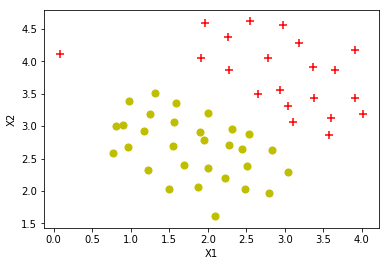

In [14]:
m, n = X.shape[0], X.shape[1]
pos, neg = (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0], 0], X[pos[:,0],1], c="r", marker="+", s = 50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
plt.xlabel('X1')
plt.ylabel('X2')

### Using SVM 

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear') # linear kernel can be understood as no kernel
classifier.fit(X, np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Visualising the training set results 

(1.5, 5)

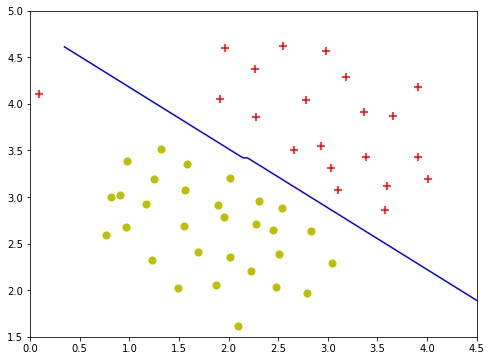

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [25]:

# Test C = 100
#when c is high, the svm model can't afford to have any cost. Thus, it can't bear any outlier.
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(1.5, 5)

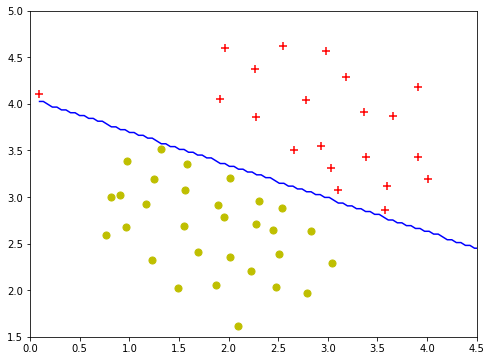

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

### SVM with gaussian kernels 

In [27]:

mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

(0.4, 1)

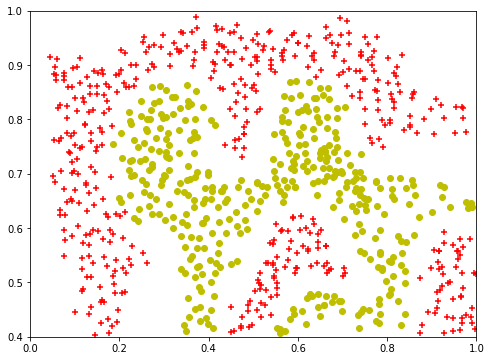

In [28]:
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [29]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.4, 1)

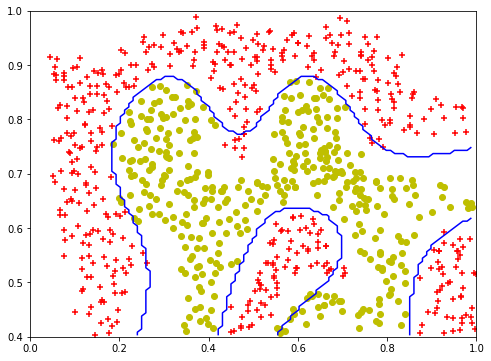

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)